1.  Importing the Libraries

In [1]:
import pandas as pd

2. Importing the Datasets

In [2]:
data = pd.read_csv('heart.csv')

3. Taking Care of missing values

In [3]:
data.isnull().sum()  #sum - not having missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

4.Taking Care of Duplicates Values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

np.True_

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

np.False_

5. Data Processing

In [9]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

6. Encoding Categorical Data

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
data['cp'].unique()

array([0, 1, 2, 3])

In [12]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [13]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


7. Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


8. Splitting the dataset into the training set and test set

In [17]:
X = data.drop('target',axis=1)

In [18]:
y = data['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [22]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

9. Logistic Regression

In [23]:
from  sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

10. SVC

In [28]:
from sklearn import svm

In [29]:
svm = svm.SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2 = svm.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

11. KNeighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [38]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [39]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [40]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

Non-Linear ML Algorithms

In [41]:
data = pd.read_csv('heart.csv')

In [42]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
data = data.drop_duplicates()

In [44]:
data.shape

(302, 14)

In [45]:
X = data.drop('target',axis=1)
y=data['target']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

12. Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier


In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred4= dt.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

13.Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier ()

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5 =rf.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred5)

0.819672131147541

14. Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier ()

In [64]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred6 = gbc.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [72]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
    'ACC': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ]
})

In [73]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.704918
4,RF,0.819672
5,GB,0.803279


In [77]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

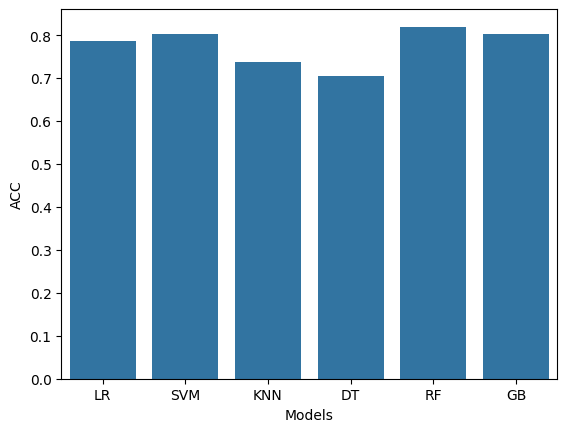

In [81]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [82]:
X= data.drop('target',axis=1)
y=data['target']

In [83]:
X.shape

(302, 13)

In [84]:
rf = RandomForestClassifier()

In [85]:
rf.fit(X,y)

RandomForestClassifier()

15. Prediction on New Data

In [86]:
import pandas as pd

In [88]:
new_data = pd.DataFrame({
    'age': 50,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3,
}, index=[0])



    

In [89]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,50,1,0,125,212,0,1,168,0,1.0,2,2,3


In [91]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease
